Installing necessary packages:

```Julia
using Pkg

Pkg.add(["DataFrames", "Statistics", "CSV", "Plots", "StatsPlots"])
```

In [1]:
using DataFrames, Statistics, CSV, Plots, StatsPlots

In [2]:
df = CSV.read(pwd() * "/data_raw/init_res.csv", DataFrame)

describe(df)

10×7 DataFrame
 Row │ variable                       mean       min      median          max  ⋯
     │ Symbol                         Float64    Float64  Float64         Floa ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ actual                         1.57611e7  618.0    354958.0        9.37 ⋯
   2 │ expected                       1.57604e7  582.652       3.55792e5  9.37
   3 │ glm_est                        1.57724e7  640.196       3.52512e5  9.37
   4 │ ols_est                        1.57718e7  601.937       3.5178e5   9.37
   5 │ expected_est                   2.72258e5  646.569       2.89695e5  9.24 ⋯
   6 │ expected_est_better            1.19835e7  647.684       4.08845e5  1.61
   7 │ actual_est                     1.19835e7  645.354       4.08984e5  1.61
   8 │ expected_est_bad_prior         1.57714e7  500.085       3.54172e5  9.37
   9 │ expected_est_better_bad_prior  1.57716e7  500.913       3.54184e5  9.37 ⋯
  10 │ actual_est_bad_prior           1.57717e7  507.43        3.54153e5  9.37
                                                               3 columns omitted

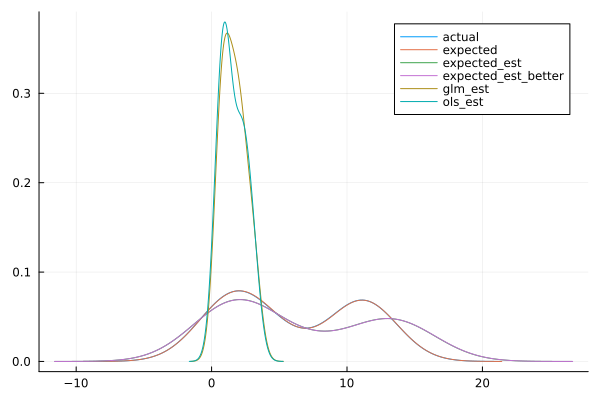

In [3]:
df_plot = stack(df, 1:6)
df_plot = df_plot[df_plot[:, :value] .< 1.5e4, :]

density(df_plot[:, :value] / 1000, group = df_plot[:, :variable])

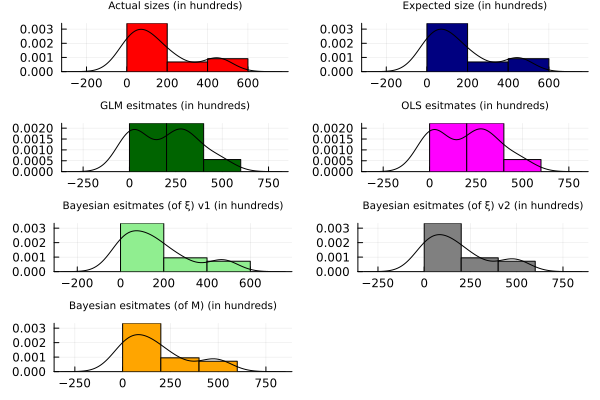

In [4]:
p1 = histogram(df[df[:, 1] .< 5e4, 1] / 100, normalize = true, legend = false, colour = :red, title = "Actual sizes (in hundreds)", titlefontsize = 7)
density!(df[df[:, 1] .< 5e4, 1] / 100, legend = false, colour = :black)

p2 = histogram(df[df[:, 2] .< 5e4, 2] / 100, normalize = true, legend = false, title = "Expected size (in hundreds)", colour = :navy, titlefontsize = 7)
density!(df[df[:, 2] .< 5e4, 2] / 100, legend = false, colour = :black)

p3 = histogram(df[df[:, 3] .< 5e4, 3] / 100, normalize = true, legend = false, title = "GLM esitmates (in hundreds)", colour = :darkgreen, titlefontsize = 7)
density!(df[df[:, 3] .< 5e4, 3] / 100, legend = false, colour = :black)

p4 = histogram(df[df[:, 4] .< 5e4, 4] / 100, normalize = true, legend = false, title = "OLS esitmates (in hundreds)", colour = :magenta, titlefontsize = 7)
density!(df[df[:, 4] .< 5e4, 4] / 100, legend = false, colour = :black)

p5 = histogram(df[df[:, 5] .< 5e4, 5] / 100, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v1 (in hundreds)", colour = :lightgreen, titlefontsize = 7)
density!(df[df[:, 5] .< 5e4, 5] / 100, legend = false, colour = :black)

p6 = histogram(df[df[:, 6] .< 5e4, 6] / 100, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v2 (in hundreds)", colour = :gray, titlefontsize = 7)
density!(df[df[:, 1] .< 5e4, 6] / 100, legend = false, colour = :black)

p7 = histogram(df[df[:, 7] .< 5e4, 6] / 100, normalize = true, legend = false, title = "Bayesian esitmates (of M) (in hundreds)", colour = :orange, titlefontsize = 7)
density!(df[df[:, 1] .< 5e4, 6] / 100, legend = false, colour = :black)

plot(
    layout = [4, 3],
    p1, p2, p3, p4, p5, p6, p7
)

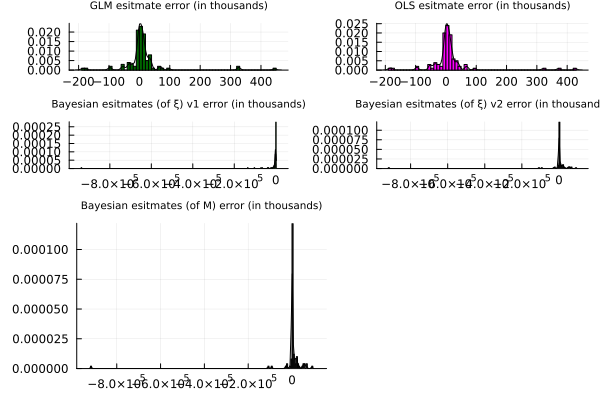

In [5]:
p1 = histogram((df[:, 3] - df[:, 1]) / 1000, normalize = true, legend = false, title = "GLM esitmate error (in thousands)", colour = :darkgreen, titlefontsize = 7)
density!((df[:, 3] - df[:, 1]) / 1000, legend = false, colour = :black)

p2 = histogram((df[:, 4] - df[:, 1]) / 1000, normalize = true, legend = false, title = "OLS esitmate error (in thousands)", colour = :magenta, titlefontsize = 7)
density!((df[:, 4] - df[:, 1]) / 1000, legend = false, colour = :black)

p3 = histogram((df[:, 5] - df[:, 1]) / 1000, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v1 error (in thousands)", colour = :lightgreen, titlefontsize = 7)
density!((df[:, 5] - df[:, 1]) / 1000, legend = false, colour = :black)

p4 = histogram((df[:, 6] - df[:, 1]) / 1000, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v2 error (in thousands)", colour = :gray, titlefontsize = 7)
density!((df[:, 6] - df[:, 1]) / 1000, legend = false, colour = :black)

p5 = histogram((df[:, 7] - df[:, 1]) / 1000, normalize = true, legend = false, title = "Bayesian esitmates (of M) error (in thousands)", colour = :gray, titlefontsize = 7)
density!((df[:, 7] - df[:, 1]) / 1000, legend = false, colour = :black)

plot(
    p1, p2, p3, p4, p5, layout = [3, 2]
)

### Higher population counts

In [6]:
df = CSV.read(pwd() * "/data_raw/init_res_1.csv", DataFrame)

describe(df)

10×7 DataFrame
 Row │ variable                       mean       min       median          max ⋯
     │ Symbol                         Float64    Float64   Float64         Flo ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ actual                         2.15606e7  371.0     528770.0            ⋯
   2 │ expected                       2.15609e7  355.536        5.27528e5
   3 │ glm_est                        2.15765e7   97.6248       5.09981e5
   4 │ ols_est                        2.15759e7   94.0068       5.09053e5
   5 │ expected_est                   2.54975e5  374.828        3.26216e5  512 ⋯
   6 │ expected_est_better            3.93233e7  375.473        2.45891e7
   7 │ actual_est                     3.93233e7  383.914        2.4589e7
   8 │ expected_est_bad_prior         2.15778e7  202.92         5.21789e5
   9 │ expected_est_better_bad_prior  2.15786e7  216.602        5.222e5        ⋯
  10 │ actual_est_bad_prior           2.15787e7  208.096        5.22187e5
                                                               3 columns omitted

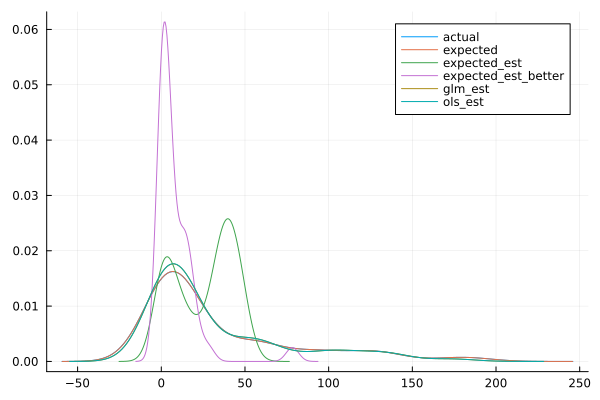

In [7]:
df_plot = stack(df, 1:6)
df_plot = df_plot[df_plot[:, :value] .< 2e6, :]

density(df_plot[:, :value] / 10000, group = df_plot[:, :variable])

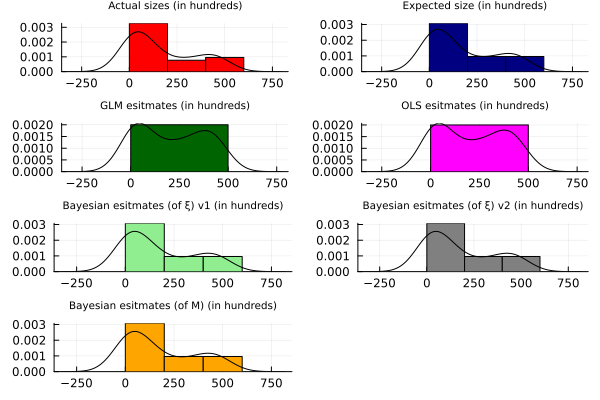

In [8]:
p1 = histogram(df[df[:, 1] .< 5e4, 1] / 100, normalize = true, legend = false, colour = :red, title = "Actual sizes (in hundreds)", titlefontsize = 7)
density!(df[df[:, 1] .< 5e4, 1] / 100, legend = false, colour = :black)

p2 = histogram(df[df[:, 2] .< 5e4, 2] / 100, normalize = true, legend = false, title = "Expected size (in hundreds)", colour = :navy, titlefontsize = 7)
density!(df[df[:, 2] .< 5e4, 2] / 100, legend = false, colour = :black)

p3 = histogram(df[df[:, 3] .< 5e4, 3] / 100, normalize = true, legend = false, title = "GLM esitmates (in hundreds)", colour = :darkgreen, titlefontsize = 7)
density!(df[df[:, 3] .< 5e4, 3] / 100, legend = false, colour = :black)

p4 = histogram(df[df[:, 4] .< 5e4, 4] / 100, normalize = true, legend = false, title = "OLS esitmates (in hundreds)", colour = :magenta, titlefontsize = 7)
density!(df[df[:, 4] .< 5e4, 4] / 100, legend = false, colour = :black)

p5 = histogram(df[df[:, 5] .< 5e4, 5] / 100, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v1 (in hundreds)", colour = :lightgreen, titlefontsize = 7)
density!(df[df[:, 5] .< 5e4, 5] / 100, legend = false, colour = :black)

p6 = histogram(df[df[:, 6] .< 5e4, 6] / 100, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v2 (in hundreds)", colour = :gray, titlefontsize = 7)
density!(df[df[:, 1] .< 5e4, 6] / 100, legend = false, colour = :black)

p7 = histogram(df[df[:, 7] .< 5e4, 6] / 100, normalize = true, legend = false, title = "Bayesian esitmates (of M) (in hundreds)", colour = :orange, titlefontsize = 7)
density!(df[df[:, 1] .< 5e4, 6] / 100, legend = false, colour = :black)

plot(
    layout = [4, 3],
    p1, p2, p3, p4, p5, p6, p7
)

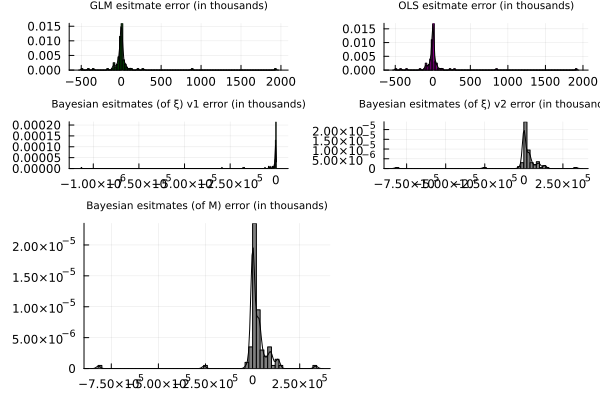

In [9]:
p1 = histogram((df[:, 3] - df[:, 1]) / 1000, normalize = true, legend = false, title = "GLM esitmate error (in thousands)", colour = :darkgreen, titlefontsize = 7)
density!((df[:, 3] - df[:, 1]) / 1000, legend = false, colour = :black)

p2 = histogram((df[:, 4] - df[:, 1]) / 1000, normalize = true, legend = false, title = "OLS esitmate error (in thousands)", colour = :magenta, titlefontsize = 7)
density!((df[:, 4] - df[:, 1]) / 1000, legend = false, colour = :black)

p3 = histogram((df[:, 5] - df[:, 1]) / 1000, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v1 error (in thousands)", colour = :lightgreen, titlefontsize = 7)
density!((df[:, 5] - df[:, 1]) / 1000, legend = false, colour = :black)

p4 = histogram((df[:, 6] - df[:, 1]) / 1000, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v2 error (in thousands)", colour = :gray, titlefontsize = 7)
density!((df[:, 6] - df[:, 1]) / 1000, legend = false, colour = :black)

p5 = histogram((df[:, 7] - df[:, 1]) / 1000, normalize = true, legend = false, title = "Bayesian esitmates (of M) error (in thousands)", colour = :gray, titlefontsize = 7)
density!((df[:, 7] - df[:, 1]) / 1000, legend = false, colour = :black)

plot(
    p1, p2, p3, p4, p5, layout = [3, 2]
)